In [1]:
#data format library
import h5py
#numpy
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
# %matplotlib notebook
from sklearn.cluster import KMeans

import sys
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
import os
from scipy.integrate import odeint
sys.path.append('../utils')
import operator_calculations as op_calc
import stats
plt.rc('text', usetex=True)
plt.rc('font',size=14)

In [3]:
range_indices = np.arange(0,100)
eps_indices = []
for idx in range_indices:

    f = h5py.File('/flash/StephensU/antonio/Lorenz/dimension_results/scaling_properties_reconstruction_nclusters_{}.h5'.format(idx),'r')
    fn = f['eps_s']
    seed_range = np.sort(np.array(list(fn.keys()),dtype=int))
    eps_s = []
    for kn,n_seeds in enumerate(seed_range):
        eps = np.array(fn[str(n_seeds)])
        eps_s.append(eps)
    K = np.array(f['MetaData/K'],dtype=int)[0]
    maxT = np.array(f['MetaData/maxT'],dtype=int)[0]
    f.close()
    eps_indices.append(eps_s)
    print(idx)

In [3]:
from scipy.spatial import distance as sdist
eps_range = np.array(10**np.array(np.arange(-4,2.1,.25),dtype=float),dtype=float)
n_samples = 5000
n_pairs = (n_samples**2-n_samples)/2

n_sims = 100
H_CP_K_eps = np.zeros((n_sims,len(eps_range)))
prob_CP_K_eps = np.zeros((n_sims,len(eps_range)))
for k in range(n_sims):
    random_times = np.random.randint(0,len(sim)-1,n_samples)
    sample_seqs = np.vstack([np.hstack(sim[t]) for t in random_times])
    print(sample_seqs.shape)
    prob_eps = np.zeros(len(eps_range))
    distances = sdist.pdist(sample_seqs,'chebyshev')
    for keps,eps in enumerate(eps_range):
        prob_eps[keps] = np.sum(distances<eps/2)/n_pairs
    H_eps = -np.log(prob_eps)
    
    H_CP_K_eps[k,:] = H_eps
    prob_CP_K_eps[k,:] = prob_eps
    print(k)

(5000, 3)


/home/antonio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


0
(5000, 3)
1
(5000, 3)
2
(5000, 3)
3
(5000, 3)
4
(5000, 3)
5
(5000, 3)
6
(5000, 3)
7
(5000, 3)
8
(5000, 3)
9
(5000, 3)
10
(5000, 3)
11
(5000, 3)
12
(5000, 3)
13
(5000, 3)
14
(5000, 3)
15
(5000, 3)
16
(5000, 3)
17
(5000, 3)
18
(5000, 3)
19
(5000, 3)
20
(5000, 3)
21
(5000, 3)
22
(5000, 3)
23
(5000, 3)
24
(5000, 3)
25
(5000, 3)
26
(5000, 3)
27
(5000, 3)
28
(5000, 3)
29
(5000, 3)
30
(5000, 3)
31
(5000, 3)
32
(5000, 3)
33
(5000, 3)
34
(5000, 3)
35
(5000, 3)
36
(5000, 3)
37
(5000, 3)
38
(5000, 3)
39
(5000, 3)
40
(5000, 3)
41
(5000, 3)
42
(5000, 3)
43
(5000, 3)
44
(5000, 3)
45
(5000, 3)
46
(5000, 3)
47
(5000, 3)
48
(5000, 3)
49
(5000, 3)
50
(5000, 3)
51
(5000, 3)
52
(5000, 3)
53
(5000, 3)
54
(5000, 3)
55
(5000, 3)
56
(5000, 3)
57
(5000, 3)
58
(5000, 3)
59
(5000, 3)
60
(5000, 3)
61
(5000, 3)
62
(5000, 3)
63
(5000, 3)
64
(5000, 3)
65
(5000, 3)
66
(5000, 3)
67
(5000, 3)
68
(5000, 3)
69
(5000, 3)
70
(5000, 3)
71
(5000, 3)
72
(5000, 3)
73
(5000, 3)
74
(5000, 3)
75
(5000, 3)
76
(5000, 3)
77
(5000,

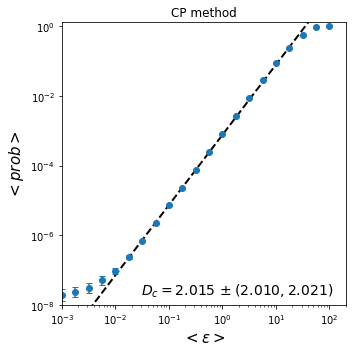

In [15]:
m_K = []
b_K = []
plt.figure(figsize=(5,5))
plt.title('CP method')
for k in range(n_sims):
    sel = np.logical_and(eps_range>2e-2,eps_range<50)
    m,b = np.polyfit(np.log10(eps_range[sel]),np.log10(prob_CP_K_eps[k,sel]),1)
    m_K.append(m)
    b_K.append(b)
xrange = np.linspace(-2.5,2.5,10)
m,cil_m,ciu_m = stats.bootstrap(m_K,n_times=1000)
b = np.mean(b_K)
mean,cil,ciu = stats.bootstrap(prob_CP_K_eps,n_times=1000)
plt.errorbar(eps_range,mean,yerr=[mean-cil,ciu-mean],fmt='o',capsize=3)
plt.xscale('log')
plt.yscale('log')
plt.plot(10**xrange,10**(m*xrange+b),c='k',ls='--',lw=2)
plt.text(3e-2,2e-8,r'$D_c = {:.3f}\,\pm ({:.3f},{:.3f})$'.format(m,cil_m[0],ciu_m[0]),fontsize=14)
plt.xlim(1e-3,2e2)
plt.ylim(1e-8,1.3)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$<\epsilon>$',fontsize=15)
plt.ylabel(r'$<prob>$',fontsize=15)
plt.tight_layout()
# plt.savefig('corr_dim_CP_Lorenz.pdf')
plt.show()

In [4]:
f = h5py.File(dir_path+'Lorenz/dimension_results/scaling_properties_combined.h5','r')
cluster_range = np.sort(np.array(list(f.keys()),dtype=int))[::2]
eps_s = []
prob_s = []
for nc in cluster_range:
    eps_s.append(np.array(f[str(nc)]['eps']))
    prob_s.append(np.array(f[str(nc)]['prob']))
f.close()

In [5]:
# from sklearn.linear_model import LinearRegression

# def bootstrap_log_linear_reg(Xs,Ys,n_times=1000):
#     coefs = np.zeros((n_times,2))
#     for k in range(n_times):
#         mean_x = np.zeros(len(Xs))
#         mean_y = np.zeros(len(Ys))
#         for ks in range(len(Xs)):
#             indices = np.random.randint(0,len(Xs[ks]),len(Xs[ks]))
#             mean_x[ks] = np.median(np.log2(Xs[ks][indices]))
#             mean_y[ks] = np.median(np.log2(Ys[ks][indices]))
#         reg = LinearRegression().fit(mean_x.reshape(-1,1), mean_y)
#         m = reg.coef_
#         b = reg.intercept_
#         coefs[k] = [m,b]
#     return coefs 

In [6]:
from sklearn.linear_model import LinearRegression

def bootstrap_log_linear_reg_N(Xs,y,n_times=1000):
    coefs = np.zeros((n_times,2))
    for k in range(n_times):
        mean_x = np.zeros(len(Xs))
        for ks in range(len(Xs)):
            indices = np.random.randint(0,len(Xs[ks]),len(Xs[ks]))
            mean_x[ks] = np.median(np.log10(Xs[ks][indices]))
        reg = LinearRegression().fit(mean_x.reshape(-1,1), np.log10(y))
        m = reg.coef_
        b = reg.intercept_
        coefs[k] = [m,b]
    return coefs 

316
398
501
630
794
1000
1258
1584
1995
2511
3162
3981
5011
6309
7943
10000
12589
15848
19952
25118
31622
39810
50118


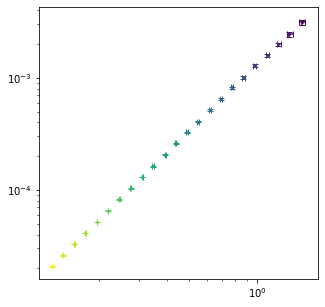

In [7]:
colors_s = plt.cm.viridis(np.linspace(0,1,len(cluster_range)))
eps_s_err = np.zeros((len(cluster_range),3))
prob_s_err = np.zeros((len(cluster_range),3))

plt.figure(figsize=(5,5))
for ks in range(len(cluster_range)):
    eps = eps_s[ks]
    mean_eps,cil_eps,ciu_eps = stats.bootstrap(eps,n_times=100,median=True)
    p = prob_s[ks]
    mean_prob,cil_prob,ciu_prob = stats.bootstrap(p,n_times=100,median=True)
    eps_s_err[ks,:] = [mean_eps,cil_eps,ciu_eps]
    prob_s_err[ks,:] = [mean_prob,cil_prob,ciu_prob]
    plt.errorbar(mean_eps,mean_prob,xerr = [mean_eps-cil_eps,ciu_eps-mean_eps],
                 yerr = [mean_prob-cil_prob,ciu_prob-mean_prob],capsize=3,c=colors_s[ks],marker='o',markersize=2)
    print(cluster_range[ks])
plt.xscale('log')
plt.yscale('log')
plt.show()


In [10]:
min_s = 5
coefs = bootstrap_log_linear_reg_N(eps_s[min_s:],1/cluster_range[min_s:],n_times=1000)
mean_m_N,mean_b_N =  coefs.mean(axis=0)
cil_m_N,cil_b_N = np.percentile(coefs,2.5,axis=0)
ciu_m_N,ciu_b_N = np.percentile(coefs,97.5,axis=0)
print(mean_m_N,cil_m_N,ciu_m_N)

2.0119902982424986 2.0043721832080292 2.0195842372766695


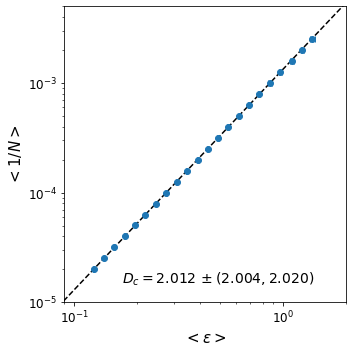

In [11]:
colors_state_=plt.rcParams['axes.prop_cycle'].by_key()['color'][:10]

plt.figure(figsize=(5,5))
for ks in range(1,len(cluster_range)):
    plt.errorbar(eps_s_err[ks,0],1/cluster_range[ks],xerr = [[eps_s_err[ks,0]-eps_s_err[ks,1]],[eps_s_err[ks,2]-eps_s_err[ks,0]]],
             capsize=3,color=colors_state_[0],fmt='o')
plt.xscale('log')
plt.yscale('log')
xrange = np.linspace(-1.5,1,10)
plt.plot(10**xrange,10**(mean_m_N*xrange+mean_b_N),c='k',ls='--')
# plt.text(0.3,0.00002,'$p = N^{-D_c/2}$',fontsize=14)
plt.text(.17,1.5e-5,r'$D_c = {:.3f}\,\pm ({:.3f},{:.3f})$'.format(mean_m_N,cil_m_N,ciu_m_N),fontsize=14)
# plt.axis('equal')
plt.xlim(9e-2,2)
plt.ylim(1e-5,5e-3)
plt.xlabel(r'$<\epsilon>$',fontsize=15)
plt.ylabel(r'$<1/N>$',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
# plt.savefig('median_Lorenz_dimensions_N.pdf')
# plt.text()
plt.show()